In [14]:
from transformers import pipeline
from nltk import sent_tokenize
import nltk
import torch
from glob import glob
import pandas as pd
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")


CUDA Available: False
GPU Name: No GPU


**Load Model**

In [3]:
from transformers import pipeline
import torch

model_name = 'facebook/bart-large-mnli'  # Rename variable to avoid conflict
device = 0 if torch.cuda.is_available() else 'cpu'

def load_model_function(device):
    # Create the zero-shot classification pipeline
    theme_classifier = pipeline("zero-shot-classification", model=model_name, device=device)
    return theme_classifier

# Load the model and create the classifier
theme_classifier = load_model_function(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [4]:
theme_list=["alone","self improvement","Friends","magic","hope","fights","sacrifice","love"]

theme_classifier(
    "He knew the cost of the battle, but he didn’t hesitate. It was his responsibility, his duty. The people he cared about needed him to step up, no matter the personal cost.",
    theme_list,
    multi_label=True,
    )

{'sequence': 'He knew the cost of the battle, but he didn’t hesitate. It was his responsibility, his duty. The people he cared about needed him to step up, no matter the personal cost.',
 'labels': ['sacrifice',
  'fights',
  'Friends',
  'love',
  'hope',
  'magic',
  'self improvement',
  'alone'],
 'scores': [0.9638010263442993,
  0.87408447265625,
  0.46084582805633545,
  0.3094131350517273,
  0.23778116703033447,
  0.19124166667461395,
  0.10170180350542068,
  0.012450644746422768]}

**Load Dataset**

In [5]:
import pandas as pd
from glob import glob

files=glob("/content/drive/MyDrive/subtitles/*.ass")

In [6]:
with open(files[0], 'r') as file:
    lines = file.readlines()
    lines= lines[27:]
    lines= [",".join(line.split(',')[:9]) for line in lines]


**cleaning Text data**

In [7]:
with open(files[0], 'r') as file:
    # Read all lines in the file
    lines = file.readlines()

    # Remove any metadata (first 27 lines are assumed to be metadata)
    lines = lines[27:]

    # Initialize an empty list to store the dialogue text
    dialogues = []

    # Process each line to extract the dialogue text
    for line in lines:
        # Split the line by the first 9 commas, the 10th part will be the dialogue text
        parts = line.split(",", 9)

        # Check if there's a dialogue part (the 10th part)
        if len(parts) > 9:
            dialogues.append(parts[9])  # Append the dialogue text (10th part)

    # Clean up and remove any empty dialogues
    dialogues = [dialogue.strip() for dialogue in dialogues if dialogue.strip()]


In [8]:
import pandas as pd
from glob import glob

def load_subtitle_data(dataset_path):
    # Get all subtitle file paths from the directory
    subtitle_paths = glob("/content/drive/MyDrive/subtitles/*.ass")

    scripts = []
    episodes_num = []

    for path in subtitle_paths:
        with open(path, 'r') as file:  # Correctly using `path` instead of `files[0]`
            # Read all lines in the file
            lines = file.readlines()

            # Remove any metadata (first 27 lines are assumed to be metadata)
            lines = lines[27:]

            # Initialize an empty list to store the dialogue text
            dialogues = []

            # Process each line to extract the dialogue text
            for line in lines:
                # Split the line by the first 9 commas, the 10th part will be the dialogue text
                parts = line.split(",", 9)

                # Check if there's a dialogue part (the 10th part)
                if len(parts) > 9:
                    dialogues.append(parts[9])  # Append the dialogue text (10th part)

            # Clean up and remove any empty dialogues
            dialogues = [dialogue.strip() for dialogue in dialogues if dialogue.strip()]

            # Remove `\N` in the text and join all dialogues into a single script
            dialogues = [dialogue.replace("\\N", " ") for dialogue in dialogues]
            script = " ".join(dialogues)

            # Extract the episode number from the file name
            # Assume the episode number is in the format `...-<episode_number>.ass`
            try:
                episode = int(path.split("-")[-1].split('.')[0].strip())
            except ValueError:
                episode = -1  # If extraction fails, set to -1 as a fallback

            # Append data to the lists
            scripts.append(script)
            episodes_num.append(episode)

    # Create a DataFrame from the collected data
    df = pd.DataFrame({"episode": episodes_num, "script": scripts})

    # Sort the DataFrame by the episode number
    df = df[df["episode"] > 0]  # Remove any entries with invalid episode numbers
    df = df.sort_values(by="episode").reset_index(drop=True)

    return df



In [39]:
# Now load the subtitle dataset
dataset_path = '/content/drive/MyDrive/subtitles/'  # Modify with your path if needed
df = load_subtitle_data(dataset_path)

# Show the first few rows of the dataset
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased b..."
2,3,"C'mon! Running like a fugitive, Being chased b..."
3,4,"C'mon! Running like a fugitive, Being chased b..."
4,5,"C'mon! Running like a fugitive, Being chased b..."


In [9]:
dataset_path="/content/drive/MyDrive/subtitles"
df=load_subtitle_data(dataset_path)

In [10]:
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased b..."
2,3,"C'mon! Running like a fugitive, Being chased b..."
3,4,"C'mon! Running like a fugitive, Being chased b..."
4,5,"C'mon! Running like a fugitive, Being chased b..."


**Run Model**

In [11]:
script = df.iloc[0]['script']


In [12]:
script

'A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can\'t let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You\'re really gonna get it this time! I don\'t care! You know your problem? You can\'t do the things I do! Only I can do this! I\'m better than all of you! Believe it! There\'s a problem, sir! Lord Hokage! What is it? Did that Naruto do something again? Yes. He climbed onto the Mountainside Images… And he vandalized and graffitied all over them! Wait! Ha ha… Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed the last

In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails, it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.']

In [20]:
# Batch Sentence
sentence_batch_size=20
script_batches = []
for index in range(0,len(script_sentences),sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)

In [21]:
script_batches[:2]

["A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
 'Yes. He climbed onto the Mountainside Images… And he vandalized and graffitied all over them! Wait! Ha ha… Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed the last 

In [22]:
theme_output= theme_classifier(        #running theme classifier model to how its perform on text data and fine theme output
    script_batches,
    theme_list,
    multi_label=True,
)

In [23]:
theme_output

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails, it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster, but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
  'labels': ['self improvement',
   'sacrifice',
   'fights',
   'magic',
   'hope',
   'Friends',
   'love',
   'alone'],
  'scores': [0.9422764778137207,
   0.7666401267051697,
   0.5133015513420105,
   0.34784817695617676,
   0.19316451251506805,
   0.18092364072799683,
   0.04

In [24]:
# Wrangle Ouput
# battle: [0.51489498, 0.2156498]
themes = {}
for output in theme_output:
    for label,score in zip(output['labels'],output['scores']):
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [25]:
themes = {key: np.mean(np.array(value)) for key,value in themes.items()}


In [26]:
themes

{'self improvement': 0.7637032250563304,
 'sacrifice': 0.729512627919515,
 'fights': 0.4128889958063761,
 'magic': 0.3968342403570811,
 'hope': 0.30962857976555824,
 'Friends': 0.25219305654366814,
 'love': 0.1581032461176316,
 'alone': 0.2929004304421445}

In [27]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    # Batch Sentence
    sentence_batch_size=20
    script_batches = []
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)

    # Run Model
    theme_output = theme_classifier(
        script_batches[:2],
        theme_list,
        multi_label=True
    )

    # Wrangle Output
    themes = {}
    for output in theme_output:
        for label,score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)

    themes = {key: np.mean(np.array(value)) for key,value in themes.items()}

    return themes

In [28]:
df = df.head(2)

In [29]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased b..."


In [30]:
output_themes = df['script'].apply(get_themes_inference)


In [31]:
output_themes


,script
0,"{'self improvement': 0.8888012170791626, 'sacr..."
1,"{'magic': 0.31856620218604803, 'love': 0.23118..."


In [32]:
theme_df = pd.DataFrame(output_themes.tolist())
theme_df

,self improvement,sacrifice,fights,magic,hope,Friends,love,alone
0,0.888801,0.677605,0.345088,0.359405,0.164627,0.188240,0.030865,0.012166
1,0.366042,0.364381,0.566718,0.318566,0.174274,0.112634,0.231184,0.021520


In [33]:
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon! Running like a fugitive, Being chased b..."


In [34]:
df[theme_df.columns] = theme_df
df

,episode,script,self improvement,sacrifice,fights,magic,hope,Friends,love,alone
0,1,"A long time ago, a powerful demon fox appeared...",0.888801,0.677605,0.345088,0.359405,0.164627,0.188240,0.030865,0.012166
1,2,"C'mon! Running like a fugitive, Being chased b...",0.366042,0.364381,0.566718,0.318566,0.174274,0.112634,0.231184,0.021520


**Some Visualize ouput**

In [37]:
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

,theme,score
0,self improvement,1.254844
1,sacrifice,1.041986
2,fights,0.911806
3,magic,0.677971
4,hope,0.338901
5,Friends,0.300874
6,love,0.262049
7,alone,0.033686


In [36]:
df.columns

Index(['episode', 'script', 'self improvement', 'sacrifice', 'fights', 'magic',
       'hope', 'Friends', 'love', 'alone'],
      dtype='object')

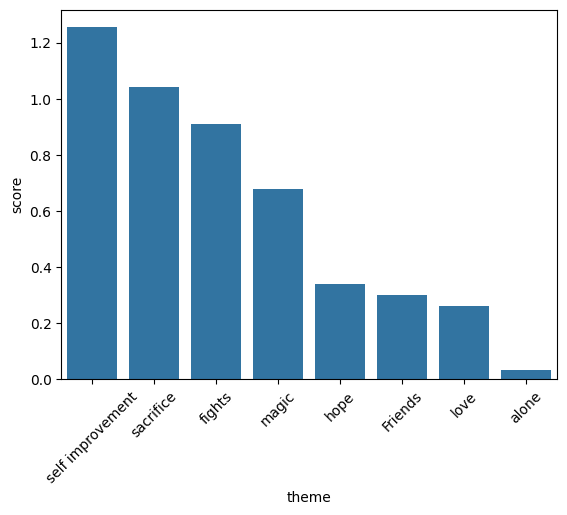

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data = theme_output ,x="theme",y="score" )
plt.xticks(rotation=45)
plt.show()

In [40]:
from transformers import pipeline
import torch
from nltk.tokenize import sent_tokenize
import nltk
import pandas as pd
import numpy as np
import os
import sys
import pathlib

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

# Load the subtitles dataset function (corrected below)
from glob import glob

def load_subtitle_data(dataset_path):
    # Get all subtitle file paths from the directory
    subtitle_paths = glob("/content/drive/MyDrive/subtitles/*.ass")

    scripts = []
    episodes_num = []

    for path in subtitle_paths:
        with open(path, 'r') as file:
            lines = file.readlines()
            lines = lines[27:]  # Remove metadata lines

            dialogues = []
            for line in lines:
                parts = line.split(",", 9)
                if len(parts) > 9:
                    dialogues.append(parts[9])  # Extract dialogue part

            dialogues = [dialogue.strip() for dialogue in dialogues if dialogue.strip()]
            dialogues = [dialogue.replace("\\N", " ") for dialogue in dialogues]
            script = " ".join(dialogues)

            try:
                episode = int(path.split("-")[-1].split('.')[0].strip())
            except ValueError:
                episode = -1  # If extraction fails, set to -1

            scripts.append(script)
            episodes_num.append(episode)

    df = pd.DataFrame({"episode": episodes_num, "script": scripts})
    df = df[df["episode"] > 0]  # Remove invalid episodes
    df = df.sort_values(by="episode").reset_index(drop=True)
    return df

# Now using the dataset loader function correctly
class ThemeClassifier():
    def __init__(self, theme_list):
        self.model_name = "facebook/bart-large-mnli"
        self.device = 0 if torch.cuda.is_available() else 'cpu'
        self.theme_list = theme_list
        self.theme_classifier = self.load_model(self.device)

    def load_model(self, device):
        theme_classifier = pipeline(
            "zero-shot-classification",
            model=self.model_name,
            device=device
        )
        return theme_classifier

    def get_themes_inference(self, script):
        script_sentences = sent_tokenize(script)

        sentence_batch_size = 20
        script_batches = []
        for index in range(0, len(script_sentences), sentence_batch_size):
            sent = " ".join(script_sentences[index:index + sentence_batch_size])
            script_batches.append(sent)

        # Run Model on the first two batches (adjust if needed)
        theme_output = self.theme_classifier(script_batches[:2], self.theme_list, multi_label=True)

        themes = {}
        for output in theme_output:
            for label, score in zip(output['labels'], output['scores']):
                if label not in themes:
                    themes[label] = []
                themes[label].append(score)

        # Average the scores for each theme
        themes = {key: np.mean(np.array(value)) for key, value in themes.items()}
        return themes

    def get_themes(self, dataset_path, save_path=None):
        # Read Save Output if Exists
        if save_path is not None and os.path.exists(save_path):
            df = pd.read_csv(save_path)
            return df

        # Load Dataset using the function
        df = load_subtitle_data(dataset_path)

        # Run Inference for each script
        output_themes = df['script'].apply(self.get_themes_inference)

        themes_df = pd.DataFrame(output_themes.tolist())
        df[themes_df.columns] = themes_df

        # Save the DataFrame if save_path is specified
        if save_path is not None:
            df.to_csv(save_path, index=False)

        return df


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
